# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [84]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.tree import export_graphviz
#import graphviz

In [85]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [86]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [87]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


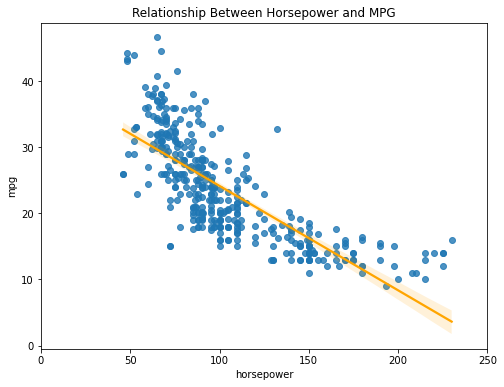

In [88]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [46]:
# call_on_students(1)

#### Answer: 

- Looking at a cost function in respect to slope (the coef) of our feature vs our target.
- Cost function is our error, and we will use gradient descent to minimize our error.


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [47]:
# call_on_students(1)

Our step size (learning rate) will continue to decrease as we get closer to our minimum error.

Gradient is our partial dervivative, and you multiply this by your alpha(learning rate).

step size = alpha * partial derivative

Too big of a step you miss, too small and it will take forever.

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [48]:
# call_on_students(1)

#### Answer: 

- Step size is how much you move down the cost function to find minimal error. Step size = alpha, alpha is multiplied with the partial dervivative.  Learning is the proportion of your partial dervivative that you want your step sizes to be.


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [49]:
# call_on_students(1)

#### Answer: 

- Logistic Regression is for the classification of binary models.
- Predict returns class, predict proba returns probability of each class.
- Linear Regression is prediciting using continious data and has a linear relationship. 
- Logestic Regression uses categorical data.
    
    -LinReg (loss - RSS)
    -LogReg (log_loss, sigmoid)


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [50]:
# call_on_students(1)

#### Answer: 

Pros:
-  Using gradient descent to optimize coeficients, by minimizing cost function, as compared to kNN
-  Easy to interpret coeficients as related to log-odds of target.
- Not prone to overfitting compared to decision trees

Cons:
- Not robust to class imbalnace in target
- Doesn't handle interactions between features well
- Prone to underfitting



- compared to a decision tree, log reg can give you some sort of equation and probabilities
- Decision trees are easier to read but aren't as accurate.


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [51]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [52]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [53]:
# call_on_students(1)

In [54]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop('target', axis=1)
y= mpg_class['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=0.33)

In [55]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [56]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [57]:
y_train.value_counts()

0    195
1     67
Name: target, dtype: int64

In [58]:
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

In [59]:
np.bincount(y_train)

array([195,  67])

#### Answer:

- We have a class imbalance
- A Dummy Classifier would return an accuracy of 74%


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- A Dummy Classifier would return an accuracy of 74%


#### Part 3: How accurate would that baseline be on test data?


In [60]:
# Code to find the answer


#### Answer:

- 


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [61]:
# call_on_students(1)

#### Answer:

- Target is imbalanced.  
- We could use SMOTE to create synthetic data by oversampling minority class.
- We also adjust class_weight parameter
- Why do we not want to undersample the majority? We would be losing a lot of data (throwing out over 50% of the data)

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [62]:
# call_on_students(1)

In [63]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train) #scaled because logreg is distance based


LogisticRegression(random_state=42)

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


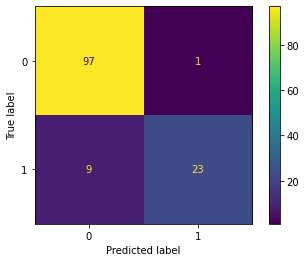

In [64]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test);

$\begin{bmatrix}
TN & FP \\
FN & TP
\end{bmatrix}$

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [65]:
# call_on_students(1)

In [89]:
tn = 97
fn = 9
fp = 1
tp = 23

In [90]:
preds = logreg.predict(X_test_scaled)

In [68]:
# Accuracy
accuracy = (tp+tn) / (tp + tn + fp +fn)
accuracy

0.9230769230769231

In [69]:
# Precision
precision = precision_score(y_test, preds)
precision

0.9583333333333334

In [70]:
# Recall
recall = tp / (tp + fn)
recall

0.71875

In [71]:
# F1-Score
f1 = (2 * tp) / ((2 * tp) + fp +fn)
f1

0.8214285714285714

In [91]:
probs = logreg.predict_proba(X_test_scaled)


In [93]:
from sklearn.metrics import log_loss

In [95]:
lg_loss = log_loss(y_test, probs)

In [96]:

lg_loss

0.1724633064750993

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [ ]:
# call_on_students(1)

In [101]:
y_prob = logreg.predict_proba(X_test_scaled)

y_hat_bc = y_prob[:, 1]

roc_auc_score(y_test, y_hat_bc)

0.9811862244897959

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


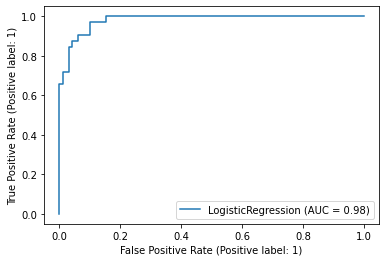

In [98]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [ ]:
# call_on_students(1)

In [102]:
f1, accuracy, recall, precision

(0.8214285714285714, 0.9230769230769231, 0.71875, 0.9583333333333334)

In [ ]:
#These are being compared to our baseline of 75%

#### Answer:

- Better than the baseline accuracy, recall is low (we missed a lot of values that were actually 1 - we have a lot of false negatives.


## Part 4: Decision Trees

### Set Up

NOTE! This code might not work for you! The images these generate are already prepopulated below because of that.

In [103]:
# Helper function from a colleague (h/t Bryan)
def plot_tree(dt, used_cols, out_file='mytree.dot'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

In [104]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [76]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, ['weight'])

NameError: name 'graphviz' is not defined

In [77]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, ['origin'])

NameError: name 'graphviz' is not defined

#### Images:

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [78]:
# call_on_students(1)

#### Answer:

- Version 1 because our gini impurity scores are lower which tells us that the first tree creates more pure nodes, and does a better job of splitting the data.  Also when looking at the values of the splits in tree 2 we see one of the values is [104, 66] which would really need to be further split because this isn't very helpful for classifying 


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [79]:
# call_on_students(1)

In [80]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


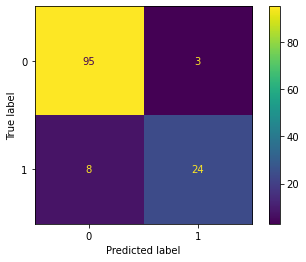

In [81]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test, y_test)

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


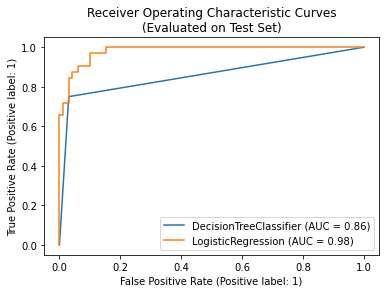

In [82]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Our logistic regression model is better with a much better AUC score.
